# Preprocessing

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data=pd.read_csv('banknote.csv', encoding='latin')
print('Shape:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

Shape: (1372, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [2]:
feature_names=np.array(data.columns)[:-1]
target=data.columns[-1]
Nfeatures=len(feature_names)

print(feature_names)
print(target)
print(Nfeatures)


['variance of Wavelet' 'skewness of Wavelet' 'curtosis of Wavelet'
 'entropy']
class
4


In [3]:
y = data[target]
X = data.drop(axis=1,labels=target,inplace=False)

In [4]:
data.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [5]:
colors = ['#DF2020', '#81DF20']
Colorlist=[]
for i in y:
    if i==1.0:
        Colorlist.append(colors[0])
    else:
        Colorlist.append(colors[1])
        

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_2=StandardScaler().fit_transform(X)



# try to use different method of combination/reduction of dimension

# PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=500)


explained_variance_ratio: [0.54497602 0.32328872]


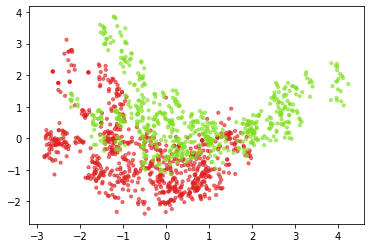

In [8]:
data2=pca.fit_transform(X_2)
print("explained_variance_ratio:",pca.explained_variance_ratio_)
plt.scatter(data2[:,0],data2[:,1],c=Colorlist, alpha = 0.6, s=10)



# MDS

In [9]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,
                metric = True, #default True
                dissimilarity='euclidean' # default euclidean
               )

stress: 28862.142553313344


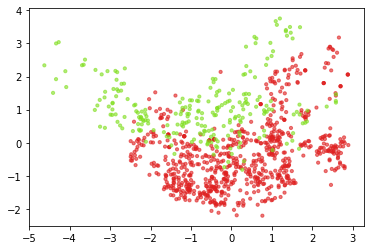

In [10]:
X_mds= embedding.fit_transform(X_2[:1000])
print("stress:",embedding.stress_)
plt.scatter(X_mds[:,0],X_mds[:,1],c=Colorlist[:1000], alpha = 0.6, s=10)

# UMAP

In [11]:
import umap
reducer = umap.UMAP(n_components=2)


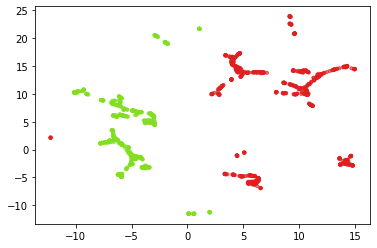

In [12]:
embedding = reducer.fit_transform(X_2)
plt.scatter(embedding[:,0],embedding[:,1],c=Colorlist, alpha = 0.6, s=10)

# t-SNE

In [26]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,learning_rate=200,init='random')

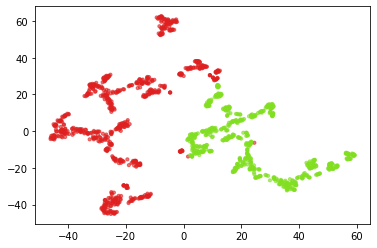

In [28]:
tsne_result = tsne.fit_transform(X_2)
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)



# ===================================================

# we choose t-SNE, because we can see obvious segments

# Clustering

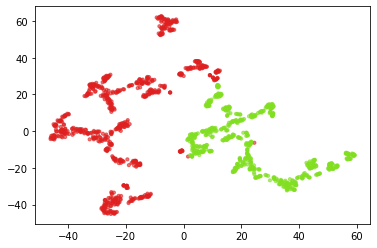

In [33]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# Now we choose the segment at the top of the graph (y>45), and use Skope-rules

number of points: 77
average prediction: 1.0


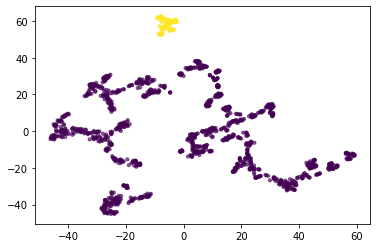

In [46]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][1]>45:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())    

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Cluster, alpha = 0.6, s=10)

In [31]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules


skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()


Rules

rule: variance of Wavelet > 1.6287000179290771 and skewness of Wavelet > 9.340699672698975 and entropy <= -1.8836499452590942
precision: 1.0
recall: 0.9824561403508771

rule: skewness of Wavelet <= 9.50314998626709 and skewness of Wavelet > 9.001349925994873 and curtosis of Wavelet <= -3.7429999113082886
precision: 1.0
recall: 0.08064516129032258

rule: variance of Wavelet > 2.852199912071228 and skewness of Wavelet <= 9.448299884796143 and skewness of Wavelet > 8.994100093841553
precision: 0.775
recall: 0.05778688524590164




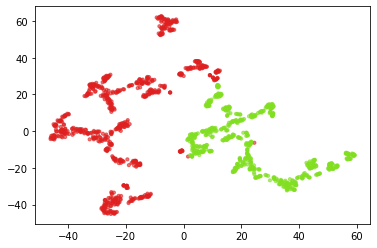

In [32]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# we choose another segment (x>50)

number of points: 59
average prediction: 2.0


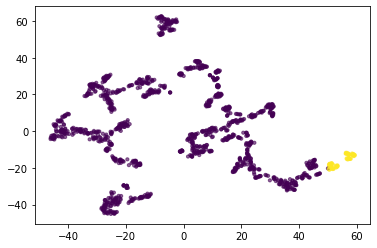

In [48]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][0]>50:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())    

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Cluster, alpha = 0.6, s=10)

In [35]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet <= -2.2181000113487244 and curtosis of Wavelet > 10.087300300598145 and entropy <= 0.2836029939353466
precision: 0.9791666666666666
recall: 1.0

rule: curtosis of Wavelet > 10.332350254058838
precision: 0.9591836734693877
recall: 0.9591836734693877

rule: skewness of Wavelet > -7.035550117492676 and curtosis of Wavelet <= 10.358049869537354 and curtosis of Wavelet > 10.087300300598145
precision: 1.0
recall: 0.0975609756097561

rule: curtosis of Wavelet <= 10.358049869537354 and curtosis of Wavelet > 10.087300300598145 and entropy <= -0.22393499314785004
precision: 0.8
recall: 0.07547169811320754




# we can use other cluster method (but not manually)

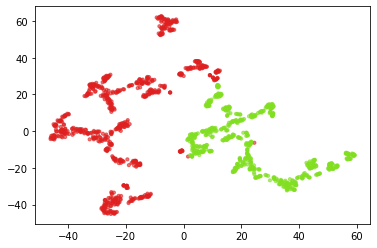

In [36]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## kmeans

In [37]:
from sklearn.cluster import KMeans

N_clusters=6 # please choose 

kmeans = KMeans(n_clusters=N_clusters, random_state=0)

Cluster_kmeans=kmeans.fit_predict(tsne_result)

In [38]:
a=[]
for i in range(N_clusters):
    a.append([[],[]])

for i in range(len(y)):
        a[Cluster_kmeans[i]][0].append(tsne_result[i][0])
        a[Cluster_kmeans[i]][1].append(tsne_result[i][1])

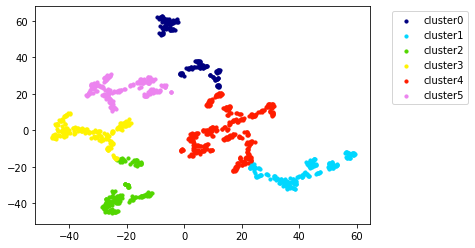

In [39]:
import matplotlib
import matplotlib.cm as cm

N=N_clusters
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.9,N)]


fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(N_clusters):
    ax.scatter(a[i][0],a[i][1],color=colors[i],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### we can choose the cluster0

number of points: 170
average prediction: 1.0588235294117647


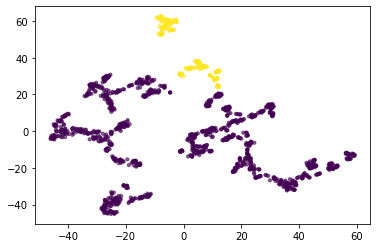

In [50]:
clusterN=0

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if Cluster_kmeans[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=label_for_skope, alpha = 0.6, s=10)

In [51]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet > -4.583299875259399 and skewness of Wavelet > 9.20930004119873 and entropy <= -2.2792999744415283
precision: 1.0
recall: 0.8561151079136691

rule: variance of Wavelet > -0.7420400083065033 and skewness of Wavelet <= 9.448299884796143 and entropy <= -3.3286499977111816
precision: 0.62
recall: 0.2246376811594203




# another cluster method


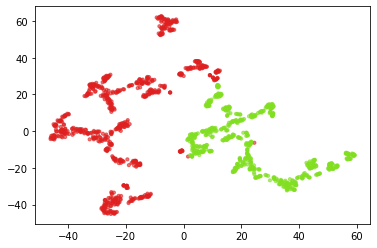

In [52]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## dbscan (we need to choose proper value of epsilon and M)

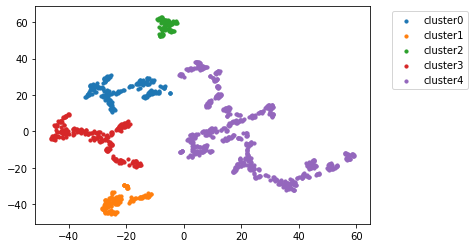

In [53]:
from sklearn.cluster import DBSCAN

epsilon = 6
M = 4

result_dbscan = DBSCAN(eps = epsilon, min_samples = M+1,algorithm='brute').fit_predict(tsne_result)


a=[]
for i in range(len(set(result_dbscan))):
    a.append([[],[]])   
    
for i in range(len(y)):
        a[result_dbscan[i]][0].append(tsne_result[i][0])
        a[result_dbscan[i]][1].append(tsne_result[i][1])

N=len(np.unique(result_dbscan))
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.9,N)]        
        
        
fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(len(set(result_dbscan))):
    ax.scatter(a[i][0],a[i][1],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


### we can choose the cluster1 for skope-rules

number of points: 131
average prediction: 1.0


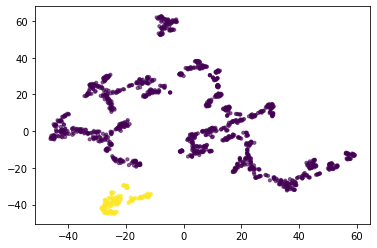

In [54]:
clusterN=1

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if result_dbscan[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())       
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=label_for_skope, alpha = 0.6, s=10)

In [55]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet > -0.18998000025749207 and skewness of Wavelet <= -2.138650059700012 and curtosis of Wavelet > 1.8599000573158264
precision: 1.0
recall: 0.9727272727272728


